# Homework 4: Analyzing Rates of Sea Level Rise
In this homework, you'll investigate sea level change using data from the ECCO state estimate. You'll look at spatial differences over the past few decades and then compare how sea level on the California coast compares to the global mean.

Begin by importing the modules you'll need for this notebook:

In [88]:
# import packages here
import os
import numpy as np
import matplotlib.pyplot as plt
import netCDF4 as nc4

## Part 1: Download Sea Surface Height Data
To begin this exercise, download all of the available sea surface height data (1992-2017) from the ECCO Version 4 Release 4 output. There are several different variables for sea surface height pertaining to different components and corrections. In this homework, we'll use the `SSHDYN` variable which is equivalent to what satellites would measure from space.

To obtain the data, use the [Downloading ECCO Data](https://github.com/ProfMikeWood/ocean_modeling_book/blob/main/tools/Downloading%20ECCO%20Data.ipynb) notebook provided with the course notes.

In [89]:
# define the path to the folder where the SSH data has been download on your machine
data_folder = '/Users/spartan/Downloads/cs185c_spring2025/Data'

## Part 2: Plot Total Sea Level Rise 1992-2017
As a first look into how sea level has changed in the past several decades, we'll look at the differences between two time periods at the beginning and end of the available model output: January 1992 and January 2017. It is important to use the same month because variations in sea level also have a seasonal cycle (as we'll see below). Begin by reading in the data:

In [90]:
# read in the longitude, latitude, and model ssh grid in January 1992 (SSHDYN_1992_01.nc)
ssh_path = os.path.join(data_folder,'ECCO','Version4','Release4',
                        'interp_monthly','SSHDYN','SSHDYN_1992_01.nc')
ds = nc4.Dataset(ssh_path)

longitude = ds.variables['longitude'][:]
latitude = ds.variables['latitude'][:]
ssh_1992 = ds.variables['SSHDYN'][:, :, :]
ds.close()

# read in the model ssh grid in January 2017 (SSHDYN_2017_01.nc)
ssh_path = os.path.join(data_folder,'ECCO','Version4','Release4',
                        'interp_monthly','SSHDYN','SSHDYN_2017_01.nc')
ds = nc4.Dataset(ssh_path)
ssh_2017 = ds.variables['SSHDYN'][:, :, :]
ds.close()

[[[ 0.          0.          0.         ...  0.          0.
    0.        ]
  [ 0.          0.          0.         ...  0.          0.
    0.        ]
  [ 0.          0.          0.         ...  0.          0.
    0.        ]
  ...
  [-0.48956394 -0.48956394 -0.48956394 ... -0.48956394 -0.48956394
   -0.48956394]
  [-0.49481136 -0.49481136 -0.49481136 ... -0.49481136 -0.49481136
   -0.49481136]
  [-0.50508922 -0.50508922 -0.50508922 ... -0.50508922 -0.50508922
   -0.50508922]]]
[[[ 0.          0.          0.         ...  0.          0.
    0.        ]
  [ 0.          0.          0.         ...  0.          0.
    0.        ]
  [ 0.          0.          0.         ...  0.          0.
    0.        ]
  ...
  [-0.42603302 -0.42603302 -0.42603302 ... -0.42603302 -0.42603302
   -0.42603302]
  [-0.43157652 -0.43157652 -0.43157652 ... -0.43157652 -0.43157652
   -0.43157652]
  [-0.4401066  -0.4401066  -0.4401066  ... -0.4401066  -0.4401066
   -0.4401066 ]]]


/var/folders/t5/sny34k513w11rlfhkkb2b4040000gp/T/ipykernel_26444/3836449440.py:6: UserWarning: WARNING: valid_range not used since it
cannot be safely cast to variable data type
  longitude = ds.variables['longitude'][:]
/var/folders/t5/sny34k513w11rlfhkkb2b4040000gp/T/ipykernel_26444/3836449440.py:7: UserWarning: WARNING: valid_range not used since it
cannot be safely cast to variable data type
  latitude = ds.variables['latitude'][:]


Now, make a plot of the difference between January 2017 and January 1992. Be sure to add a colorbar with a divergent colormaps and set the color bounds to be equal in the positive and negative directions.

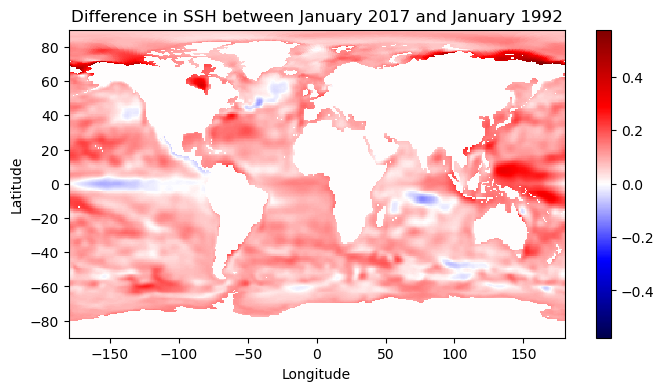

In [135]:
# make a plot of the differences between 2017 and 1992
# plt.figure(figsize=(8, 4))
# plt.pcolormesh(longitude, latitude, ssh[0,:,:], cmap='turbo', vmin=0, vmax=1)
# plt.title('Sea Surface Temperature (SST) Equatorial Pacific')
# plt.colorbar(label='Temperature (°C)')
# plt.xlabel('Longitude')
# plt.ylabel('Latitude')
# plt.show()
ssh_diff = ssh_2017 - ssh_1992
fig = plt.figure(figsize=(8,4))
max_abs_value = np.max(np.abs(ssh_diff))
plt.pcolormesh(longitude, latitude, ssh_diff[0, :, :], cmap = 'seismic', vmin=-max_abs_value, vmax=max_abs_value)

plt.colorbar(orientation='vertical')

plt.title('Difference in SSH between January 2017 and January 1992')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

# Show the plot
plt.show()

### Questions:
Where are the largest increases in sea level observed between these two time periods? Are there any locations on the globe where sea level has fallen? If so, where?

Answer: The largest increases in sea level observed between these two time periods are areas near melting ice sheets around north pole along 60S to 80S. There are locations on the globe where sea level has fallen where ocean changes in currents or wind pattern or glacial isostatic adjustment are middle of pacific ocean and indian ocean along equator and North Atlantic Ocean along 40N to 60N

reference: https://oceanservice.noaa.gov/facts/glacial-adjustment.html#:~:text=Though%20the%20ice%20melted%20long,constantly%2C%20if%20slowly%2C%20changing.

## Part 3: Create a Timeseries of Sea Surface Height in California
Next, we'll make a timeseries of sea surface height at a point off the California coast near San José. A close location in the model is at 37$^{\circ}$N, 122$^{\circ}$W. Begin by finding the closest row and column in the model grid to this longitude and latitude.

In [140]:
# define the latitude and longitude
lon = -122
lat = 37

# find the row and column closest to the location of the point off the CA coast
# note that you have already read in the longitude and latitude if the grid to make the plot above
lon_idx = np.argmin(np.abs(longitude - lon))
lat_idx = np.argmin(np.abs(latitude - lat))
print(lon_idx)
print(lat_idx)

# make a list to contain the file names
file_list = []

# loop through the 12 months
for year in range(1992,2018):
    for month in range(1,13):
        file_list.append('SSHDYN_'+str(year)+'_'+'{:02d}'.format(month)+'.nc')

# print(file_list)

115
253


Now, armed with your sample location, loop through each sea surface height file to make a timeseries of sea level rise between 1992 and 2017. Every time you access a file, sample the model grid at the row and column you identified above.

In [136]:
# create a timeseries of ssh at the point above by looping through all of the ssh files
# each time through the loop, sample the ssh grid at the row and column identified above
# your timeseries should be an (N,2) array with time in the first column and ssh values in the second
ca_timeseries = np.zeros((len(file_list),2))

# loop through each file
for i in range(len(file_list)):
    # identify path to the data file
    month_file = os.path.join(data_folder,'ECCO','Version4','Release4',
                          'interp_monthly','SSHDYN',file_list[i])
    
    ds = nc4.Dataset(month_file)
    ssh = np.array(ds['SSHDYN'][:])
    time = np.array(ds['time'][:])
    ds.close()
    ca_timeseries[i, 0] = time[0]
    ca_timeseries[i, 1] = ssh[0,lat_idx,lon_idx]

## Part 4: Create a Timeseries of Global Mean Sea Surface Height
Next, make a timeseries of sea surface height averaged across the globe. Your loop should look quite similar to that above - you'll just need to make a slight change to average across the whole ocean rather than sampling at a single point.

In [137]:
# create a timeseries of the global mean ssh by looping through all of the ssh files
# each time through the loop, take the mean of the ssh grid at the row and column identified above
# when you take the mean, be sure to exclude 0 values, which pertain to land
# your timeseries should be an (N,2) array with time in the first column and ssh values in the second
global_timeseries = np.zeros((len(file_list),2))

# loop through each file
for i in range(len(file_list)):
    # identify path to the data file
    month_file = os.path.join(data_folder,'ECCO','Version4','Release4',
                          'interp_monthly','SSHDYN',file_list[i])
    
    ds = nc4.Dataset(month_file)
    time = np.array(ds['time'][:])
    ssh = np.array(ds['SSHDYN'][:])
    ds.close()
    ssh = ssh[ssh != 0]
    global_timeseries[i, 0] = time[0]
    global_timeseries[i, 1] = ssh.mean()

    
# global_timeseries = np.zeros((len(file_list)))

# # loop through each file
# for i in range(len(file_list)):
#     # identify path to the data file
#     month_file = os.path.join(data_folder,'ECCO','Version4','Release4',
#                           'interp_monthly','SSHDYN',file_list[i])
    
#     ds = nc4.Dataset(month_file)
#     # time = np.array(ds['time'][:])
#     ssh = np.array(ds['SSHDYN'][:])
#     ds.close()
#     ssh = ssh[ssh != 0]
#     # global_timeseries[i, 0] = time[0]
#     global_timeseries[i] = ssh.mean()

## Part 5: Compute Trends in Sea Surface Height
To compare the two timeseries, compute trends by fitting a line to each timeseries and examining the slope. Print out each trend in mm/yr, rounded to 2 decimal places. Note that the units of sea surface height are in meters.

In [139]:
# compute the trends in SLR by fitting a line to the CA and the global mean timeseries
# define a time array for months
months = np.arange(len(ca_timeseries))

# convert to "decimal years"
dec_yr =1992 + months/12

# compute the line coefficients
coef_ca = np.polyfit(dec_yr, ca_timeseries[:,1],1)
coef_global = np.polyfit(dec_yr, global_timeseries[:,1],1)
# coef_global = np.polyfit(dec_yr, global_timeseries[:],1)

# print the coefficients
print(coef_ca)
print(coef_global)

# print out the statistics in mm/yr for each timeseries
# make a plot of the sea ice timeseries
ca_val = (coef_ca[0]*1000*12).round(2)
global_val = (coef_global[0]*1000*12).round(2)
print('California SSH in mm/yr: '+ str(ca_val))
print('Global SSH in mm/yr: '+ str(global_val))
# Global SSH in mm/yr: 40.52

[ 2.07810589e-03 -3.97193825e+00]
[ 3.37681458e-03 -6.84047517e+00]
California SSH in mm/yr: 24.94
Global SSH in mm/yr: 40.52


### Question:
How does the trend in sea level rise in California compare to the global mean rate?

Answer: The trend in sea level rise in California is smaller than the global mean rate of sea level rise which is about 2/3 the rate of the global mean.

## Part 6: Plot the Timeseries of Sea Surface Height
Finally, plot the two timeseries on the same plot along with their trend lines. Be sure to label your axes and include a legend.

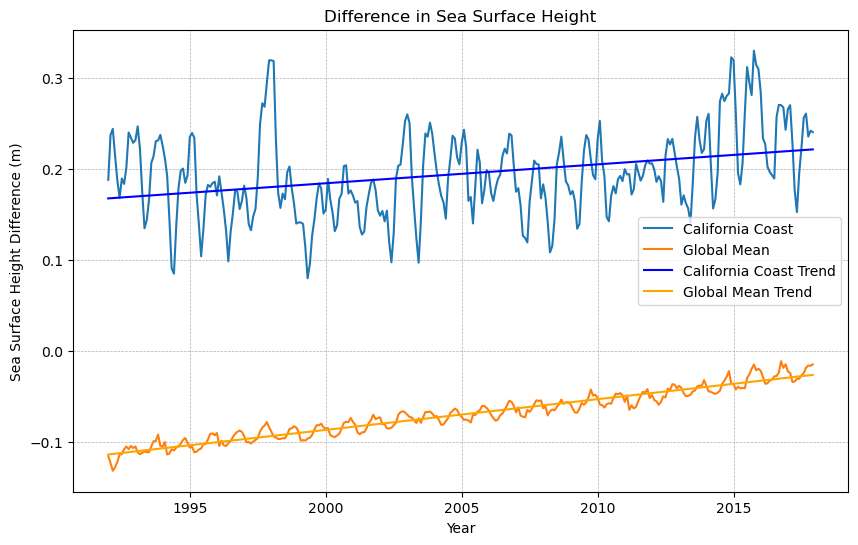

In [151]:
# create your plot here
fig = plt.figure(figsize=(10,6))

# plot timeseries
plt.plot(dec_yr, ca_timeseries[:,1], label='California Coast')
plt.plot(dec_yr, global_timeseries[:,1], label='Global Mean')

# y=mx+b
ca_trend_line = coef_ca[0]*dec_yr+coef_ca[1]
global_trend_line = coef_global[0]*dec_yr+coef_global[1]

# plot trends
plt.plot(dec_yr, ca_trend_line, label='California Coast Trend', color='blue')
plt.plot(dec_yr, global_trend_line, label='Global Mean Trend', color='orange')

plt.xlabel('Year')
plt.ylabel('Sea Surface Height Difference (m)')
plt.title('Difference in Sea Surface Height')
plt.grid(linestyle='--',linewidth=0.5)
plt.legend()
plt.show()

### Questions:

How do the timeseries for Calfiornia and the global mean compare? Comment on their variability. What are the two highest years of sea level in California? What oceanographic phenomenon happened during this time?

Answer: California's sea level shows much more fluctuation over short periods, with bigger swings up and down, while the global average rises more steadily.  Although both show an overall increase, the upward trend in the global sea level is more obvious. The highest sea levels in California occurred around 1998 and then again in 2015 and 2016.  These peaks align with strong El Niño events, which are known to cause temporary increases in sea level along the California coast.

refer: https://www.ggweather.com/ca_enso/ca_elnino.html